In [77]:
import json
import os
import pickle
import matplotlib.pyplot as plt

import sys
sys.path.append("..") 

In [5]:
def load_synth_data(dataset_name, base_folder='data'):
    """
    This function loads the synthesized data provided in a picke file in the
    /data directory.
    """

    data_path = os.path.join(base_folder, dataset_name)

    with open(data_path, 'rb') as handle:
        data = pickle.load(handle)

    trainX = data['trainX']
    trainY = data['trainY']

    return trainX, trainY

In [6]:
X, y = load_synth_data("synth_data")

In [37]:
# X[0]

In [8]:
X.shape

(10000, 28, 28)

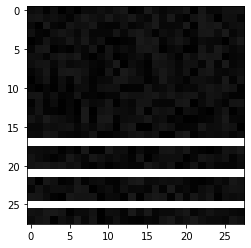

In [38]:
plt.imshow(X[4999], cmap='gray')

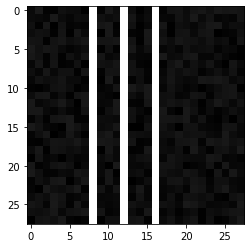

In [39]:
plt.imshow(X[5000], cmap='gray')

In [19]:
y.shape

(10000,)

In [31]:
y[9999]

1.0

Apparently, 
- all the images from 0 to 4,999 are 3 horizontal yellow lines in X, classified as 0 in y
- all the images from 4,999 to 9,999 are 3 vertical yellow lines in X, classified as 1 in y

# Experimenting for Text Classification

In [343]:
import json
import os

import matplotlib.pyplot as plt
import numpy as np
import sklearn

from src.preprocess import *

from collections import Counter

In [344]:
def load_data(path):
    if 'cache' not in load_data.__dict__:
        load_data.cache = dict()
    if path not in load_data.cache:
        load_data.cache[path] = dict()
        with open(os.path.join(path, 'train.jsonl')) as f:
            train_exs = [json.loads(line) for line in f]
        with open(os.path.join(path, 'dev.jsonl')) as f:
            dev_exs = [json.loads(line) for line in f]
        with open(os.path.join(path, 'test.jsonl')) as f:
            test_exs = [json.loads(line) for line in f]
        load_data.cache[path] = {
            'train_exs': train_exs,
            'dev_exs': dev_exs,
            'test_exs': test_exs,
            }
    return load_data.cache[path]['train_exs'], load_data.cache[path]['dev_exs'], load_data.cache[path]['test_exs']


In [345]:
folder = 'data'

# AGN Data
agn_sub_folder = 'agn_small'
agn_path = os.path.join(folder, agn_sub_folder)

# DBPedia Data
dbpedia_sub_folder = 'dbpedia_small'
dbpedia_path = os.path.join(folder, dbpedia_sub_folder)

# Loading both datasets
train_agn, dev_agn, test_agn = load_data(agn_path)
train_dbpedia, dev_dbpedia, test_dbpedia = load_data(dbpedia_path)


In [346]:
train_agn[0]['text']

"Fannie Mae Discloses Document Request The mortgage giant said today that prosecutors had asked the company to preserve documents as part of an investigation into Fannie Mae's accounting practices."

In [347]:
train_agn[0]['label']

2

In [348]:
print("AGN DATA")
print("TRAINING ", len(train_agn))
print("DEV ", len(dev_agn))
print("TEST ", len(test_agn))

AGN DATA
TRAINING  5000
DEV  5000
TEST  5000


In [349]:
print("DBPEDIA DATA")
print("TRAINING ", len(train_dbpedia))
print("DEV ", len(dev_dbpedia))
print("TEST ", len(test_dbpedia))

DBPEDIA DATA
TRAINING  5000
DEV  10000
TEST  10000


In [350]:
train_texts_agn = [x['text'] for x in train_agn]
train_labels_agn = [x['label'] for x in train_agn]
dev_texts_agn = [x['text'] for x in dev_agn]
dev_labels_agn = [x['label'] for x in dev_agn]
test_texts_agn = [x['text'] for x in test_agn]
test_labels_agn = [x['label'] for x in test_agn]

In [351]:
np.unique(train_labels_agn)

array([0, 1, 2, 3])

In [352]:
train_texts_dbpedia = [x['text'] for x in train_dbpedia]
train_labels_dbpedia = [x['label'] for x in train_dbpedia]
dev_texts_dbpedia = [x['text'] for x in dev_dbpedia]
dev_labels_dbpedia = [x['label'] for x in dev_dbpedia]
test_texts_dbpedia = [x['text'] for x in test_dbpedia]
test_labels_dbpedia = [x['label'] for x in test_dbpedia]

In [353]:
np.unique(train_labels_dbpedia)

array(['1', '10', '11', '12', '13', '14', '2', '3', '4', '5', '6', '7',
       '8', '9'], dtype='<U2')

In [354]:
dict(zip(range(len(np.unique(train_labels_dbpedia))), np.unique(train_labels_dbpedia)))

{0: '1',
 1: '10',
 2: '11',
 3: '12',
 4: '13',
 5: '14',
 6: '2',
 7: '3',
 8: '4',
 9: '5',
 10: '6',
 11: '7',
 12: '8',
 13: '9'}

In [356]:
t = torch.Tensor(2)

In [365]:
t[1].item()

-3.6893488147419103e+19

In [367]:
torch.Tensor([2]).item()

2.0

In [368]:
int(True)

1

In [68]:
%timeit -n1 -r1 preprocess_texts(train_texts_agn)

5.42 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [69]:
%timeit -n1 -r1 [preprocess_string(x) for x in train_texts_agn]

18.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


### Preprocessing is at least 3x faster with multiprocessing module!

In [119]:
preprocessed_train_texts_agn = preprocess_texts(train_texts_agn)

In [120]:
len(counter_all_texts)

17186

In [243]:
def non_rare_vocabulary(texts, min_freq=20):
    
    counter = Counter(texts[0])

    for text in texts[1:]:
        counter += Counter(text)
    
    print("Size of dictionary BEFORE removing rare tokens: ", len(counter))
    
    sorted_items = sorted(counter.items(), key = lambda x: x[1])
    
    index = 0
    
    for sorted_item in sorted_items:
        
        if sorted_item[1] >= min_freq:
            break
            
        index+=1
        
    print("Size of dictionary AFTER  removing rare tokens: ", len(sorted_items[index:]))
        
    return [x[0] for x in sorted_items[index:]]

In [244]:
vocabulary = non_rare_vocabulary(preprocessed_train_texts_agn)

Size of dictionary BEFORE removing rare tokens:  17186
Size of dictionary AFTER  removing rare tokens:  1264


In [143]:
dictionary = dict(zip(vocabulary, range(len(vocabulary))))

In [250]:
def bag_of_words(texts, vocabulary):
    
    bow = np.zeros((len(texts), len(vocabulary)))
    
    for ii in range(len(texts)):
        
        for word in texts[ii]:
            
            if word in vocabulary:
                
                bow[ii, vocabulary.index(word)] += 1
                
    return bow

In [248]:
bow = bag_of_words(preprocessed_train_texts_agn, vocabulary)

In [249]:
bow.shape

(5000, 1264)

In [251]:
def term_document_frequency(term, texts):
    
    counter = 0
    
    for text in texts:
        if term in text:
            counter += 1
            
    return counter


def idf(texts, vocabulary):
    
    doc_freq = np.zeros((len(vocabulary),))
    N = len(texts)
                        
    for ii in range(len(vocabulary)):
        doc_freq[ii] = np.log(N / term_document_frequency(vocabulary[ii], texts))
        
    return doc_freq


def tf_idf(texts, vocabulary):
    
    # Instantiate results
    tfidf = np.zeros((len(texts), len(vocabulary)))
    
    # One-off calculation of Inverse Document Frequency
    doc_freq = idf(texts, vocabulary)
    
    for ii in range(len(texts)):
        # Find Term Frequency for each word in a text
        for word in texts[ii]:
            
            if word in vocabulary:
                
                tfidf[ii, vocabulary.index(word)] += 1
        
        # Multiply the Term Frequency by Inverse Document Frequency
        tfidf[ii, ] *= tfidf[ii, ] * doc_freq
                
    return tfidf

In [263]:
len(vocabulary) # min freq = 20 => 1264

1264

In [270]:
doc_freq = np.zeros((len(vocabulary),))
N = len(preprocessed_train_texts_agn)

In [271]:
N

5000

In [268]:
doc_freq

array([0., 0., 0., ..., 0., 0., 0.])

In [266]:
for ii in range(len(vocabulary)):
    
    tdf = term_document_frequency(vocabulary[ii], preprocessed_train_texts_agn)
    if tdf == 0:
        print(vocabulary[ii])

In [272]:
preprocessed_dev_texts_agn = preprocess_texts(dev_texts_agn)

In [273]:
len(preprocessed_dev_texts_agn)

5000

In [275]:
vocabulary_10 = non_rare_vocabulary(preprocessed_train_texts_agn, min_freq=10)

Size of dictionary BEFORE removing rare tokens:  17186
Size of dictionary AFTER  removing rare tokens:  2594


In [276]:
for ii in range(len(vocabulary_10)):
    
    tdf = term_document_frequency(vocabulary_10[ii], preprocessed_dev_texts_agn)
    if tdf == 0:
        print(vocabulary_10[ii])

kuznetsova
terry
tying
logic
renault
maryland


In [277]:
term_document_frequency('kuznetsova', preprocessed_dev_texts_agn)

0

In [278]:
term_document_frequency('kuznetsova', preprocessed_train_texts_agn)

8

In [252]:
tfidf_test = tf_idf(preprocessed_train_texts_agn, vocabulary)

In [254]:
bow[0].shape

(1264,)

In [253]:
tfidf_test[0].shape

(1264,)

In [226]:
doc_freq = idf(preprocessed_train_texts_agn, vocabulary)

In [237]:
el = 2
sum(bow[el] * doc_freq == tfidf_test[el])

2578

In [239]:
sample = preprocessed_train_texts_agn[2]

In [242]:
bag_of_words([sample], dictionary)

array([[0., 0., 0., ..., 3., 0., 1.]])

# Pretrained gensim GloVe

In [331]:
from glove_preprocess import *

ModuleNotFoundError: No module named 'glove_preprocess'

In [280]:
import gensim.downloader
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [286]:
glove_50 = gensim.downloader.load('glove-wiki-gigaword-50')

In [295]:
glove_300 = gensim.downloader.load('glove-wiki-gigaword-300')

In [332]:
def docs_to_vecs(texts):
    
    doc_vecs = []
    
    for text in texts:
        doc_vecs.append(doc_to_vec(text))
    
    return np.array(doc_vecs)
    

In [340]:
def doc_to_vec(text):
    
    lst_vec = []
    
    for word in text:
        try:
            lst_vec.append(glove_50.get_vector(word))
        except:
            pass # Ignore word if it's not in vocabulary of glove_50
    
    vec = np.array(lst_vec)
    
    return np.concatenate((np.min(vec, axis=0), np.max(vec, axis=0), np.mean(vec, axis=0)))

In [341]:
doc_vecs = docs_to_vecs(preprocessed_train_texts_agn)

In [342]:
doc_vecs.shape

(5000, 150)

In [326]:
doc_to_lst_vec(preprocessed_train_texts_agn[0])

array([-0.34665, -1.2208 , -1.6818 , -0.32276, -1.086  , -0.91728,
       -1.48   , -1.1169 , -0.66653, -0.90342, -0.68009, -0.43626,
       -1.495  , -0.7545 , -0.69254, -0.67989, -1.2313 , -1.2488 ,
       -1.2487 , -1.1134 , -0.48666, -0.89571, -1.0948 , -1.0104 ,
       -1.2839 , -2.8148 , -0.81646, -0.72781, -1.2785 , -1.1074 ,
       -0.85929, -1.554  , -1.4286 , -1.7039 , -0.97489, -0.98191,
       -1.156  , -1.2601 , -0.70122, -1.8901 , -1.2894 , -0.96999,
       -0.2044 , -0.73446, -1.0029 , -1.324  , -1.2698 , -0.53378,
       -0.41208, -1.2563 ,  1.252  ,  0.70103,  1.0218 ,  1.9264 ,
        1.0336 ,  0.55007,  0.38074,  1.0704 ,  0.97724,  0.60625,
        0.7839 ,  1.9683 ,  0.86728,  0.69134,  1.1775 ,  0.76867,
        1.1758 ,  0.86418,  1.7109 ,  0.93362,  1.919  ,  1.0976 ,
        0.56247,  0.33546,  0.52887, -0.36292,  0.57246,  0.40181,
        0.82769,  0.52532,  3.6203 ,  0.10631,  1.5299 ,  1.6715 ,
        0.88006,  0.69213,  1.0897 ,  0.73337,  1.7019 ,  0.88

In [307]:
len(preprocessed_train_texts_agn[0])

20

In [309]:
vec = doc_to_lst_vec(preprocessed_train_texts_agn[0])
vec.shape

(20, 50)

In [324]:
np.concatenate((np.min(vec, axis=0), np.max(vec, axis=0))).shape

(100,)

In [316]:
np.mean(vec, axis=0)

array([ 0.5129216 , -0.3456387 ,  0.11658785,  0.37906614,  0.07267785,
        0.12695189, -0.5628189 , -0.18563476,  0.14696649, -0.21250646,
       -0.20769611,  0.51875883, -0.24164061, -0.28366277,  0.4381968 ,
        0.22160034, -0.297945  , -0.21991885,  0.6341165 , -0.07414886,
        0.5203911 ,  0.12426932, -0.11121847, -0.4230724 , -0.24759929,
       -1.3041091 , -0.20250769, -0.2281249 , -0.38858035, -0.25279957,
        2.1322832 , -0.43749842, -0.09611396, -0.09402324,  0.08958058,
       -0.2428383 , -0.3070224 , -0.19834761,  0.41254443, -0.48689333,
       -0.31469467, -0.12435479,  0.3625005 ,  0.32293645, -0.113247  ,
       -0.3375218 , -0.35044962,  0.5436712 ,  0.22465971,  0.09516959],
      dtype=float32)

In [303]:
%timeit -n1 -r3 doc_to_lst_vec(preprocessed_train_texts_agn[0])

The slowest run took 4.37 times longer than the fastest. This could mean that an intermediate result is being cached.
55.2 µs ± 32 µs per loop (mean ± std. dev. of 3 runs, 1 loop each)


In [298]:
doc_to_lst_vec(preprocessed_train_texts_agn[0])

[array([ 0.51858 , -1.2208  ,  0.6279  ,  0.3215  , -0.81454 ,  0.19868 ,
        -1.0625  , -0.78582 ,  0.13986 , -0.015715, -0.68009 ,  1.9683  ,
         0.17382 , -0.0353  , -0.082481,  0.50708 , -0.24114 , -0.28463 ,
         1.3451  ,  0.24414 ,  0.43136 , -0.017569, -0.044608, -1.0104  ,
        -0.081388, -0.38584 ,  0.41714 , -0.69551 , -0.99668 ,  0.030061,
         0.99328 , -0.38101 ,  0.41525 ,  1.0554  ,  0.42508 , -0.24135 ,
        -0.80147 , -0.8814  ,  1.0809  , -1.5758  , -1.2894  , -0.058513,
         0.10407 ,  0.86128 , -0.17925 , -0.42157 , -0.51703 ,  0.060946,
         0.96175 ,  0.24866 ], dtype=float32),
 array([ 0.23011 , -0.31189 ,  0.35439 ,  0.71926 , -1.086   ,  0.37271 ,
        -0.44409 , -0.4782  , -0.14431 , -0.40757 , -0.48845 ,  1.0953  ,
        -0.25289 , -0.7545  ,  0.15286 ,  0.76867 , -0.45392 , -0.033975,
         1.7109  ,  0.93362 ,  0.14199 ,  0.33371 , -0.081341, -0.23418 ,
         0.24652 , -0.36292 ,  0.081633, -0.57218 , -1.2785  , -0

In [293]:
glove_50.get_vector(vocabulary[0])

array([-0.90743 ,  0.30887 ,  1.0604  ,  0.088596,  0.30813 ,  0.38332 ,
       -0.43078 , -0.096476,  0.51664 ,  0.186   ,  0.28332 , -0.76336 ,
       -0.636   ,  0.52167 ,  0.88101 ,  0.1594  ,  0.30474 , -0.31674 ,
       -1.5727  , -1.1203  ,  0.43566 , -0.53812 , -0.37352 , -0.47691 ,
        0.92426 , -0.99819 , -0.30322 , -0.065498,  0.49301 , -0.1758  ,
        2.1002  ,  0.7036  ,  0.037695,  0.78172 , -0.13428 , -0.85177 ,
       -0.060642,  0.47088 ,  0.014336, -0.6508  , -0.59218 , -0.34837 ,
        0.34901 ,  0.012822,  0.19881 , -1.148   ,  1.2566  , -0.35399 ,
        0.15462 , -0.007928], dtype=float32)

In [288]:
vocabulary[0]

'jump'

In [291]:
glove_300.get_vector(vocabulary[0])

array([ 4.1856e-01,  1.1667e-01,  1.4532e-01, -1.5860e-01, -1.0859e-01,
        6.5428e-01,  6.0782e-01,  1.9933e-01,  6.4012e-02, -8.5111e-01,
       -2.6930e-01,  4.5384e-02,  5.3103e-01, -5.0595e-01,  2.9599e-01,
       -1.4278e-01,  2.2715e-01,  4.3917e-01, -9.5810e-02, -3.4818e-02,
       -7.8255e-02,  3.1025e-01,  2.4654e-01,  1.3593e-01,  7.2104e-01,
        2.4174e-01,  3.7919e-01, -5.2771e-01,  6.7417e-02, -5.1387e-04,
       -4.7082e-01, -3.5409e-01,  7.1399e-02, -4.5007e-01, -1.2700e+00,
       -3.9152e-02, -4.3962e-01, -3.0530e-01,  4.2129e-01,  5.5825e-01,
       -2.4132e-01, -2.7852e-01, -2.9255e-01,  2.8258e-01, -1.0905e-01,
        2.2107e-01,  2.5958e-02, -4.6881e-02,  2.0935e-01,  1.0207e-02,
       -6.2091e-02,  1.4928e-01, -1.9476e-01, -6.8775e-02, -3.7693e-01,
        5.0580e-01, -2.1583e-01, -2.7067e-01, -4.5578e-01,  3.4214e-01,
       -1.8316e-01,  4.4525e-01, -2.7951e-03, -1.0516e-02, -1.2205e-01,
       -5.5907e-01, -3.2110e-01,  5.4732e-01,  2.8810e-01, -1.07

# Try a Non-DL model

In [1]:
import json
import os

import matplotlib.pyplot as plt
import numpy as np
import sklearn
from gensim.utils import simple_preprocess
import gensim.downloader
import multiprocessing
import nltk
from nltk.corpus import stopwords

from collections import Counter

from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [2]:
def load_data(path):
    if 'cache' not in load_data.__dict__:
        load_data.cache = dict()
    if path not in load_data.cache:
        load_data.cache[path] = dict()
        with open(os.path.join(path, 'train.jsonl')) as f:
            train_exs = [json.loads(line) for line in f]
        with open(os.path.join(path, 'dev.jsonl')) as f:
            dev_exs = [json.loads(line) for line in f]
        with open(os.path.join(path, 'test.jsonl')) as f:
            test_exs = [json.loads(line) for line in f]
        load_data.cache[path] = {
            'train_exs': train_exs,
            'dev_exs': dev_exs,
            'test_exs': test_exs,
            }
    return load_data.cache[path]['train_exs'], load_data.cache[path]['dev_exs'], load_data.cache[path]['test_exs']

def preprocess_string(string):
    '''Tokenizes and removes stopwords'''

    # Convert string to list of lowercase tokens, which are not too long (1 character) or too short (>15 characters)
    tokenized_string = simple_preprocess(string
                                         , min_len = 3 # default 2
                                         , max_len = 15) # default 15

    no_stops_string = [word for word in tokenized_string if word not in stopwords.words('english')]

    return no_stops_string


def preprocess_texts(texts):

    pool=multiprocessing.Pool(multiprocessing.cpu_count())

    preprocessed_texts = pool.map(preprocess_string, texts)

    pool.close()

    return preprocessed_texts

In [3]:
folder = 'data'

# AGN Data
agn_sub_folder = 'agn_small'
agn_path = os.path.join(folder, agn_sub_folder)

# DBPedia Data
dbpedia_sub_folder = 'dbpedia_small'
dbpedia_path = os.path.join(folder, dbpedia_sub_folder)

# Loading both datasets
train_agn, dev_agn, test_agn = load_data(agn_path)
train_dbpedia, dev_dbpedia, test_dbpedia = load_data(dbpedia_path)

# Texts & Labels - AGN
train_texts_agn = [x['text'] for x in train_agn]
train_labels_agn = [x['label'] for x in train_agn]
dev_texts_agn = [x['text'] for x in dev_agn]
dev_labels_agn = [x['label'] for x in dev_agn]
test_texts_agn = [x['text'] for x in test_agn]
test_labels_agn = [x['label'] for x in test_agn]

# Texts & Labels - DBPedia
train_texts_dbpedia = [x['text'] for x in train_dbpedia]
train_labels_dbpedia = [x['label'] for x in train_dbpedia]
dev_texts_dbpedia = [x['text'] for x in dev_dbpedia]
dev_labels_dbpedia = [x['label'] for x in dev_dbpedia]
test_texts_dbpedia = [x['text'] for x in test_dbpedia]
test_labels_dbpedia = [x['label'] for x in test_dbpedia]

In [5]:
# glove = gensim.downloader.load('glove-wiki-gigaword-50')
#  glove = gensim.downloader.load('glove-wiki-gigaword-300') 
# glove = gensim.downloader.load('fasttext-wiki-news-subwords-300')
# glove = gensim.downloader.load('glove-twitter-200')
glove = gensim.downloader.load('word2vec-google-news-300')

def docs_to_vecs(texts):
    

    # print("RETRIEVED GLOVE EMBEDDINGS")

    doc_vecs = []
    
    for text in texts:

        lst_vec = []
    
        for word in text:
            try:
                lst_vec.append(glove.get_vector(word))
            except:
                pass # Ignore word if it's not in vocabulary of glove_50
    
        vec = np.array(lst_vec)
        if len(vec) == 0:
            np_vec = np.zeros((900,)) # train text 779 is "The Ss.", which becomes [] when preprocessed and breaks things; this solves for that.
        else:
            np_vec = np.concatenate((np.min(vec, axis=0), np.max(vec, axis=0), np.mean(vec, axis=0)))

        doc_vecs.append(np_vec)
    
    return np.array(doc_vecs)

[--------------------------------------------------] 1.4% 23.5/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=-------------------------------------------------] 3.3% 54.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=====---------------------------------------------] 11.1% 185.0/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[======--------------------------------------------] 13.7% 227.1/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[========------------------------------------------] 17.1% 284.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=========-----------------------------------------] 19.7% 327.2/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===========---------------------------------------] 22.4% 371.7/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[============--------------------------------------] 24.9% 414.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=============-------------------------------------] 27.5% 457.7/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===============-----------------------------------] 30.2% 502.0/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[================----------------------------------] 33.2% 552.1/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================---------------------------------] 35.6% 592.1/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===================-------------------------------] 38.4% 638.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[====================------------------------------] 41.3% 687.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=====================-----------------------------] 43.2% 718.2/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[======================----------------------------] 45.2% 751.7/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[========================--------------------------] 49.8% 828.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================================================-] 99.8% 1659.8/1662.8MB downloaded


In [6]:
preprocessed_train_texts = preprocess_texts(train_texts_dbpedia)
print("PREPROCESSED TRAIN TEXTS: ", len(preprocessed_train_texts))
preprocessed_dev_texts = preprocess_texts(dev_texts_dbpedia)
print("PREPROCESSED DEV TEXTS: ", len(preprocessed_dev_texts))
preprocessed_test_texts = preprocess_texts(test_texts_dbpedia)
print("PREPROCESSED TEST TEXTS: ", len(preprocessed_test_texts))

PREPROCESSED TRAIN TEXTS:  5000
PREPROCESSED DEV TEXTS:  10000
PREPROCESSED TEST TEXTS:  10000


In [7]:
train_features = docs_to_vecs(preprocessed_train_texts)
print("TRAIN FEATURES SHAPE ", train_features.shape)
dev_features = docs_to_vecs(preprocessed_dev_texts)
print("DEV FEATURES SHAPE ", dev_features.shape)
test_features = docs_to_vecs(preprocessed_test_texts)
print("TEST FEATURES SHAPE ", test_features.shape) 

TRAIN FEATURES SHAPE  (5000, 900)
DEV FEATURES SHAPE  (10000, 900)
TEST FEATURES SHAPE  (10000, 900)


In [8]:
test_features.shape

(10000, 900)

## word2vec-google-news-300

In [9]:
nb = GaussianNB()
nb.fit(train_features, train_labels_dbpedia)
nb.score(test_features, test_labels_dbpedia)

0.8508

In [13]:
rf = RandomForestClassifier(n_estimators=500)
rf.fit(train_features, train_labels_dbpedia)
rf.score(test_features, test_labels_dbpedia)

0.9348

In [12]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(train_features, train_labels_dbpedia)
logreg.score(test_features, test_labels_dbpedia)

0.9481

## fasttext-wiki-news-subwords-300

In [19]:
nb = GaussianNB()
nb.fit(train_features, train_labels_dbpedia)
nb.score(test_features, test_labels_dbpedia)

0.8279

In [20]:
rf = RandomForestClassifier(n_estimators=300)
rf.fit(train_features, train_labels_dbpedia)
rf.score(test_features, test_labels_dbpedia)

0.9246

In [21]:
logreg = LogisticRegression(max_iter=500)
logreg.fit(train_features, train_labels_dbpedia)
logreg.score(test_features, test_labels_dbpedia)

0.9234

## Glove 300

In [11]:
nb = GaussianNB()
nb.fit(train_features, train_labels_dbpedia)
nb.score(test_features, test_labels_dbpedia)

0.8695

In [25]:
rf = RandomForestClassifier(n_estimators=300)
rf.fit(train_features, train_labels_dbpedia)
rf.score(test_features, test_labels_dbpedia)

0.9346

In [26]:
logreg = LogisticRegression(max_iter=500)
logreg.fit(train_features, train_labels_dbpedia)
logreg.score(test_features, test_labels_dbpedia)

/Users/kristiyan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9528

# Appendix

In [71]:
Counter(preprocessed_train_texts_agn[0])

Counter({'fannie': 2,
         'mae': 2,
         'discloses': 1,
         'document': 1,
         'request': 1,
         'mortgage': 1,
         'giant': 1,
         'said': 1,
         'today': 1,
         'prosecutors': 1,
         'asked': 1,
         'company': 1,
         'preserve': 1,
         'documents': 1,
         'part': 1,
         'investigation': 1,
         'accounting': 1,
         'practices': 1})

In [72]:
Counter(preprocessed_train_texts_agn[0]) + Counter(preprocessed_train_texts_agn[1])

Counter({'fannie': 2,
         'mae': 2,
         'discloses': 1,
         'document': 1,
         'request': 1,
         'mortgage': 1,
         'giant': 1,
         'said': 2,
         'today': 1,
         'prosecutors': 1,
         'asked': 1,
         'company': 1,
         'preserve': 1,
         'documents': 1,
         'part': 1,
         'investigation': 1,
         'accounting': 1,
         'practices': 1,
         'amp': 3,
         'vonage': 2,
         'battle': 1,
         'voice': 1,
         'calls': 2,
         'getting': 1,
         'cheaper': 1,
         'announced': 1,
         'lower': 1,
         'monthly': 2,
         'charges': 1,
         'late': 1,
         'last': 1,
         'week': 1,
         'would': 1,
         'reduce': 1,
         'charge': 1,
         'five': 1,
         'dollars': 1,
         'month': 1,
         'unlimited': 1,
         'local': 1,
         'long': 1,
         'distance': 1,
         'canada': 1})

In [73]:
cnt0 = Counter(preprocessed_train_texts_agn[0])

In [74]:
cnt1 = Counter(preprocessed_train_texts_agn[1])

In [75]:
len(cnt0.keys())

18

In [76]:
len(cnt1.keys())

26

In [77]:
set(cnt0.keys()).intersection(set(cnt1.keys()))

{'said'}

In [78]:
len((cnt0+cnt1))

43

In [79]:
lst0 = ['A','A','C']
lst1 = ['A','B','B']
Counter(lst0)+Counter(lst1)


Counter({'A': 3, 'C': 1, 'B': 2})

In [256]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [260]:
torch.cat((torch.Tensor([1,2,3]), torch.Tensor([1,2,3])), 0)

tensor([1., 2., 3., 1., 2., 3.])

In [261]:
torch.Tensor([])

tensor([])